## Assignment week 05: Sleeping habits

Welcome to **week five** of this course programming 1. You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. Learning outcomes:


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [42]:
#code printing percentage missing data
import pandas as pd
import numpy as np
df=pd.read_csv('D:\programming1\BFVM19PROG1\data\sleep.csv')
percent_missing = df.isnull().sum() * 100 / len(df)
print(df)
print(percent_missing)
print('the percentage of missing value of Hours is: ', percent_missing['Hours'])

    Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0      Yes    8.0        Yes       Yes      3       Yes
1       No    6.0        Yes       Yes      3        No
2      Yes    6.0        Yes       Yes      2       Yes
3       No    7.0        Yes       Yes      4        No
4       No    7.0        Yes       Yes      2       Yes
..     ...    ...        ...       ...    ...       ...
99      No    7.0        Yes       Yes      2       Yes
100     No    7.0         No       Yes      3       Yes
101    Yes    8.0        Yes       Yes      3       Yes
102    Yes    7.0        Yes       Yes      2       Yes
103    Yes    6.0        Yes       Yes      3       Yes

[104 rows x 6 columns]
Enough        0.000000
Hours         1.923077
PhoneReach    0.000000
PhoneTime     0.000000
Tired         0.000000
Breakfast     0.000000
dtype: float64
the percentage of missing value of Hours is:  1.9230769230769231


In [43]:
#code printing answer dependent and independent variables
print('Tiredness and Breakfast are independent')
print('Hours of sleep is dependent')

Tiredness and Breakfast are independent
Hours of sleep is dependent


In [44]:
#code printing answer about datatypesp
print(df.dtypes)
df=df.dropna()
print(df)
df_heatmap=df.copy()
df_anova=df.copy()
df=df.astype({'Hours':'int64','Breakfast':"category",'Tired':"category"})
#
print(df.dtypes)

Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object
    Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0      Yes    8.0        Yes       Yes      3       Yes
1       No    6.0        Yes       Yes      3        No
2      Yes    6.0        Yes       Yes      2       Yes
3       No    7.0        Yes       Yes      4        No
4       No    7.0        Yes       Yes      2       Yes
..     ...    ...        ...       ...    ...       ...
99      No    7.0        Yes       Yes      2       Yes
100     No    7.0         No       Yes      3       Yes
101    Yes    8.0        Yes       Yes      3       Yes
102    Yes    7.0        Yes       Yes      2       Yes
103    Yes    6.0        Yes       Yes      3       Yes

[102 rows x 6 columns]
Enough          object
Hours            int64
PhoneReach      object
PhoneTime       object
Tired         category
Breakfast     category
dtype: object


---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [45]:
#code your answer to the value counts and distribution plots here
print('hours','\n',df['Hours'].value_counts().sort_index())
print('Tired','\n',df['Tired'].value_counts().sort_index())
print('Breakfast','\n',df['Breakfast'].value_counts())

hours 
 2      2
4      4
5     12
6     24
7     35
8     16
9      8
10     1
Name: Hours, dtype: int64
Tired 
 1     4
2    26
3    39
4    23
5    10
Name: Tired, dtype: int64
Breakfast 
 Yes    61
No     41
Name: Breakfast, dtype: int64


Loading BokehJS ...

Text(0.5, 1.0, 'Histogram of Sleep Hours')

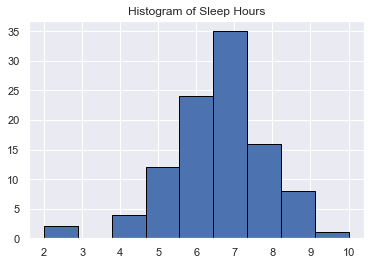

In [46]:
import matplotlib.pyplot as plt
from bokeh.plotting import figure , show , output_notebook
output_notebook()

plt.hist(df['Hours'], bins=9, alpha=1, color='b',edgecolor='black',align='mid')
plt.title('Histogram of Sleep Hours')

Text(0.5, 1.0, 'Histogram of Tired degree')

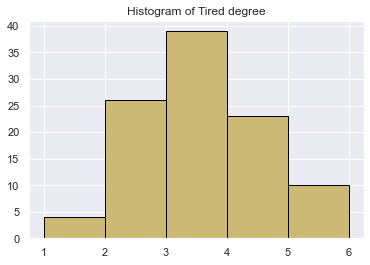

In [47]:
plt.hist(df['Tired'], bins=range(1,7), alpha=1, color='y',edgecolor='black',align='mid')
plt.title('Histogram of Tired degree')

Text(0.5, 1.0, 'Histogram of Brekfast')

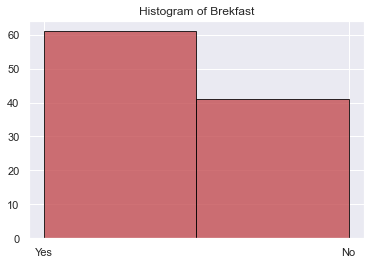

In [48]:
plt.hist(df['Breakfast'], bins=2, alpha=0.8, color='r',edgecolor='black',align='mid')
plt.title('Histogram of Brekfast')

plt.hist(df['Tired'], bins=15, density=True, alpha=1, color='y')


In [49]:
#code for the scatter plot here
from bokeh.models import Circle, ColumnDataSource, Grid, LinearAxis, Plot
import matplotlib.pyplot as plt
from bokeh.plotting import figure , show , output_notebook
from bokeh.transform import jitter
output_notebook()

from bokeh.transform import factor_cmap

index_cmap = factor_cmap('Breakfast', palette=['yellow', 'blue'],factors=sorted(df.Breakfast.unique()))

p=figure(title='Hours of sleep and tiredness ', tools='')
p.scatter(x=jitter('Tired', width=0.3), y=jitter('Hours',width=0.3),fill_color=index_cmap,\
     source=df, fill_alpha=0.3,size=12,legend='Breakfast')
p.xaxis.axis_label='Tired'
p.yaxis.axis_label='Hours'
p.legend.location='bottom_left'
show(p)



Loading BokehJS ...

In [50]:
#code your answer to the target statistics here
df['Hours'].describe()
print(df_heatmap.head())
df_heatmap['Breakfast']=df_heatmap['Breakfast'].map(dict(Yes=1,No=0))
df_heatmap['Enough']=df_heatmap['Enough'].map(dict(Yes=1,No=0))
df_heatmap['PhoneReach']=df_heatmap['PhoneReach'].map(dict(Yes=1,No=0))
df_heatmap['PhoneTime']=df_heatmap['PhoneTime'].map(dict(Yes=1,No=0))
df_heatmap=df_heatmap.astype({'Breakfast':'float','Tired':'float','PhoneReach':'float','PhoneTime':'float'})
print(df_heatmap.head())

  Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0    Yes    8.0        Yes       Yes      3       Yes
1     No    6.0        Yes       Yes      3        No
2    Yes    6.0        Yes       Yes      2       Yes
3     No    7.0        Yes       Yes      4        No
4     No    7.0        Yes       Yes      2       Yes
   Enough  Hours  PhoneReach  PhoneTime  Tired  Breakfast
0       1    8.0         1.0        1.0    3.0        1.0
1       0    6.0         1.0        1.0    3.0        0.0
2       1    6.0         1.0        1.0    2.0        1.0
3       0    7.0         1.0        1.0    4.0        0.0
4       0    7.0         1.0        1.0    2.0        1.0


There is no clear correlation 


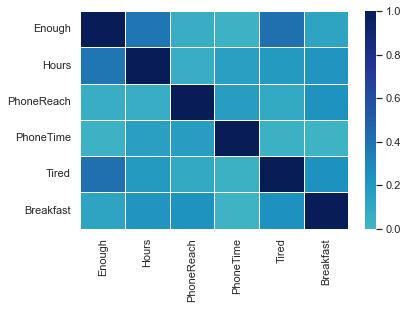

In [51]:
#code your answer for the heatmap here and briefly state your finding
corr_map=df_heatmap.corr().abs()
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

ax = sns.heatmap(corr_map,center=0,linewidths=.5,cmap="YlGnBu",vmin=0, vmax=1)
print("There is no clear correlation ")

---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [52]:
# your code to plot here
import numpy as np
import scipy.special
from bokeh.models import Span
from scipy.stats import norm
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
#make a plot
plot_df= np.histogram(df['Hours'],density=True, bins=9)
p = figure(title='Hours of Sleep', tools='', background_fill_color="#fafafa")
p.quad(top=plot_df[0], bottom=0, left=plot_df[1][:-1], right=plot_df[1][1:],
           fill_color="navy", line_color="white", alpha=0.5,legend_label='Data')
  
p.y_range.start = 0
p.legend.location = "center_right"
p.legend.background_fill_color = "#fefefe"
p.xaxis.axis_label = 'Hours'
p.yaxis.axis_label = 'Density'
p.grid.grid_line_color="white"

#average_line
av_line=Span(location=df['Hours'].median(),dimension='height', line_color='yellow',
                               line_width=3)
p.line([],[], line_color="yellow", line_width=4, alpha=0.7, legend_label="Average_line")
p.add_layout(av_line)

#robuust_line
robuust_line=Span(location=df['Hours'].mean(),dimension='height', line_color='red',
                              line_dash='dashed', line_width=3)
p.line([],[],legend_label="robuust_line", line_color="red", line_width=4, alpha=0.7, line_dash='dashed')
p.add_layout(robuust_line)

mu=np.mean(df['Hours'])
sigma2 = np.mean((df['Hours'] - mu)**2)
sigma=np.sqrt(sigma2)

#normal distribution
x = np.linspace(0, 11, 1000)
pdf = norm.pdf(x,mu,sigma)
p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")

show(p)

In [53]:
# briefly summarize your findings
shapiro_test=scipy.stats.shapiro(df['Hours'])
print('The hypothesis 0 is : The distribution is normal')
print(shapiro_test)
print('if p value < 0.05 : the hypothesis 0 is rejected')
print('So the distribution is not normal one')


The hypothesis 0 is : The distribution is normal
ShapiroResult(statistic=0.93398118019104, pvalue=7.15833084541373e-05)
if p value < 0.05 : the hypothesis 0 is rejected
So the distribution is not normal one


<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

<AxesSubplot:>

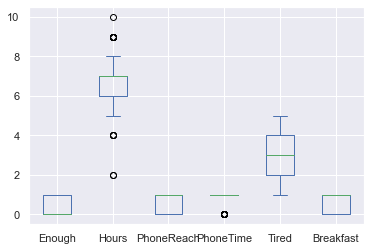

In [54]:
# your code to plot here
import pandas as pd
df_box=df_heatmap.copy()


df_box.plot.box()



In [55]:
# your code for the statistical test here
from scipy.stats import levene
print('The hypothesis 0 is that all input samples are from populations with equal variances.')
levene_test=levene(df_box['Tired'],df_box['Hours'], center='mean', proportiontocut=0.05)
print(levene_test)
print('If p < 0.05 : the hypothesis 0 is rejected')
print('The small p-value suggests that the populations do not have equal variances.')

The hypothesis 0 is that all input samples are from populations with equal variances.
LeveneResult(statistic=7.736702341120503, pvalue=0.005923233352129717)
If p < 0.05 : the hypothesis 0 is rejected
The small p-value suggests that the populations do not have equal variances.


In [56]:
# briefly summarize your findings
print('I think the tests are shown that there are significant differences between groups ')

I think the tests are shown that there are significant differences between groups 


---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [57]:
#your solution here
#df_box=df_heatmap.copy()
df_anova['Tired']=df_heatmap['Tired'].map({1:'No',2:'No',3:'Maybe',4:'Yes',5:'Yes'})
df_anova['Breakfast']=df_anova['Breakfast'].map({'No':'0','Yes':'1'}).astype('float')
print(df_anova)



    Enough  Hours PhoneReach PhoneTime  Tired  Breakfast
0      Yes    8.0        Yes       Yes  Maybe        1.0
1       No    6.0        Yes       Yes  Maybe        0.0
2      Yes    6.0        Yes       Yes     No        1.0
3       No    7.0        Yes       Yes    Yes        0.0
4       No    7.0        Yes       Yes     No        1.0
..     ...    ...        ...       ...    ...        ...
99      No    7.0        Yes       Yes     No        1.0
100     No    7.0         No       Yes  Maybe        1.0
101    Yes    8.0        Yes       Yes  Maybe        1.0
102    Yes    7.0        Yes       Yes     No        1.0
103    Yes    6.0        Yes       Yes  Maybe        1.0

[102 rows x 6 columns]


---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

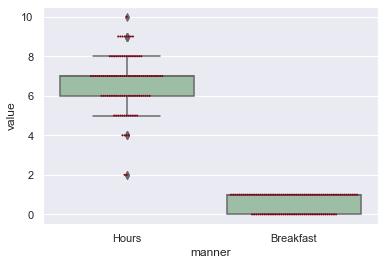

Null hypothesis: Groups means are equal 
fvalue =  1662.2564853917077 pvalue =  1.9624055543249208e-99
The p value obtained from ANOVA analysis is significant (p < 0.05),so the null hypothesis is rejected and therefore,we conclude that there are significant differences among Hours of sleep and Breakfast.


In [58]:
#Your solution here
#research question 1
# reshape the dataframe suitable for statsmodels package 
df_melt = pd.melt(df_anova.reset_index(), id_vars=['index'], value_vars=['Hours','Breakfast'])
# replace column names
df_melt.columns = ['index', 'manner', 'value']
# generate a boxplot to see the data distribution by manner. Using boxplot, we can 
# easily detect the differences between different manner
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='manner', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x='manner', y='value', data=df_melt, color='#7d0013',size=2)
plt.show()

import scipy.stats as stats
print('Null hypothesis: Groups means are equal ')
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_anova['Hours'], df_anova['Breakfast'])
print('fvalue = ',fvalue, 'pvalue = ',pvalue)

# note: if the data is balanced (equal sample size for each group), Type 1 and 2 sums of squares
# (typ parameter) will produce similar results.
print('The p value obtained from ANOVA analysis is significant (p < 0.05),so the null hypothesis is rejected and therefore,we conclude that there are significant differences among Hours of sleep and Breakfast.')

                         sum_sq     df            F        PR(>F)
C(Tired)               3.912032    2.0     1.733591  1.793192e-01
C(manner)           1872.176471    1.0  1659.285434  3.374010e-98
C(Tired):C(manner)     0.193809    2.0     0.085885  9.177337e-01
Residual             223.403963  198.0          NaN           NaN
The p value obtained from ANOVA analysis(9.177337e-01) is not significant (p > 0.05),so the null hypothesis is not rejected and therefore,we conclude that there are no significant differences.


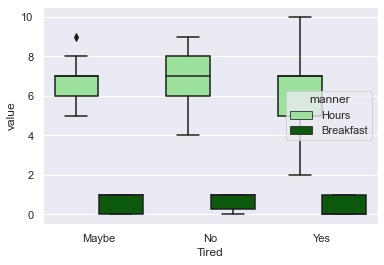

In [59]:
#research question2
import pandas as pd
import seaborn as sns
# reshape the dataframe suitable for statsmodels package 
d_melt = pd.melt(df_anova, id_vars=['Tired'], value_vars=['Hours', 'Breakfast'])
# replace column names
d_melt.columns = ['Tired', 'manner', 'value']
d_melt.head()
# generate a boxplot to see the data distribution by Tired and manner. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Tired", y="value", hue="manner", data=d_melt, palette=['lightgreen','darkgreen']) 

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(Tired) + C(manner) + C(Tired):C(manner)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print('The p value obtained from ANOVA analysis(9.177337e-01) is not significant (p > 0.05),so the null hypothesis is not rejected and therefore,we conclude that there are no significant differences.')


---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [60]:
#your solution here